In [19]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# load as Pandas dataframe
log_df = pd.read_json('logins.json', convert_dates=True)
log_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [22]:
log_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [26]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [30]:
log_15 = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(log_15)), index=log_15)
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [31]:
log_df = log_df.sort_values('login_time')
log_df.tail()

,login_time
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23
93140,1970-04-13 18:57:38


In [35]:
p = 0 
for i in range(len(log_df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    l = log_df['login_time'][i]
    if s < l < e:
        ts[p] = ts[p] + 1
    else:
        while (e < l): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

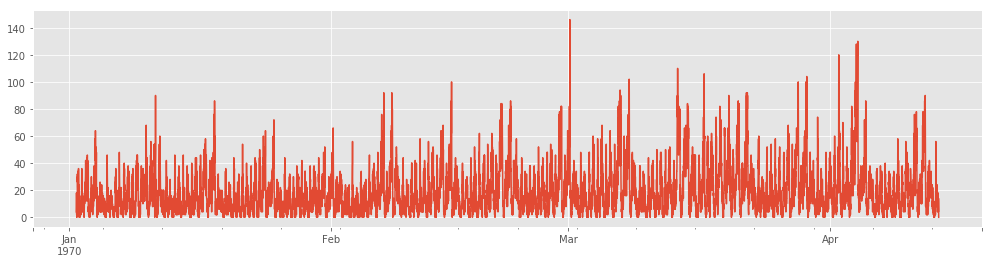

In [36]:
% matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(17,4)) # The entire data set
ts.plot()

We can see that there are major peaks, at weekly intervals. Let's take a look and see if they are on a specific day each time.


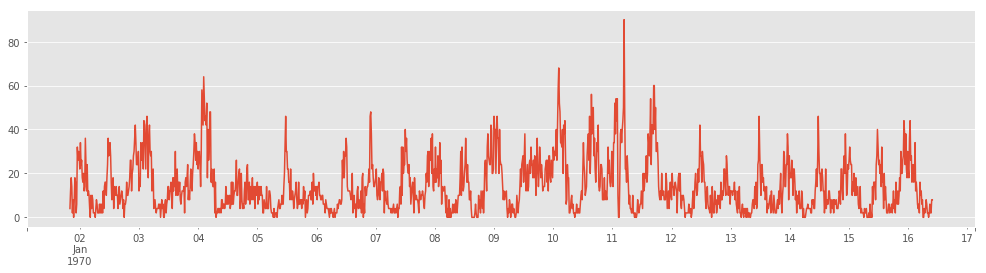

In [37]:
plt.figure(figsize=(17,4))# first 2 weeks
ts[0:1400].plot()

In [39]:
ts.max()


146.0

In [40]:
ts.min()

0.0

Looking historically Jan 02, 1970 was on a Friday. Thus looking at the peaks which are always on the weekends.

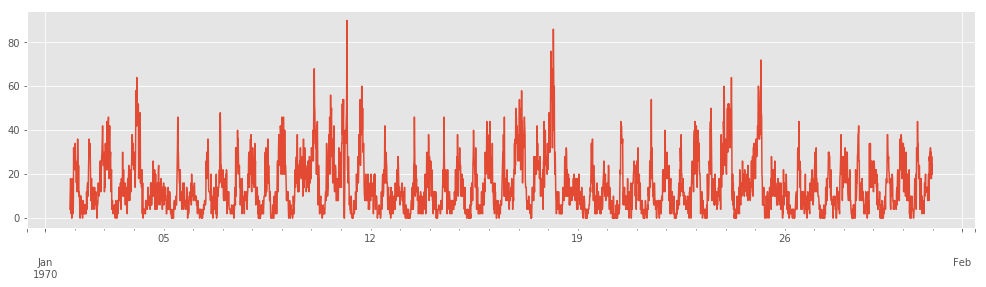

In [45]:
plt.figure(figsize=(17,4))# first month January
ts[0:2800].plot()

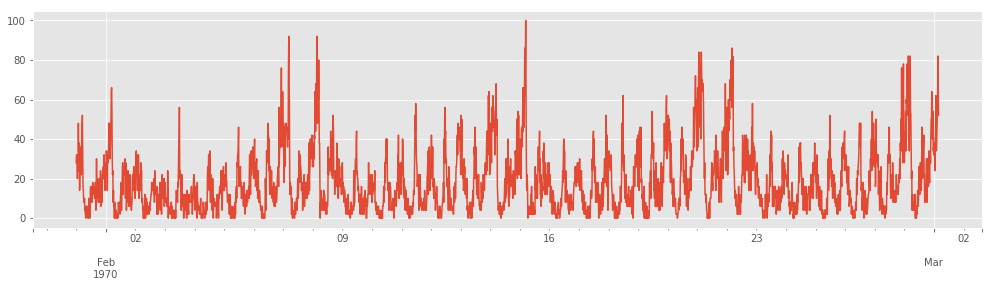

In [50]:
plt.figure(figsize=(17,4))# second month Feburary
ts[2800:5600].plot()

The trend holds, the weekends are the most popular for cyclest.


Part 2-
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities
The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
--The Key measure of success would be an increase in the number of trips taken over the toll roads. I would look at the data for number of tolls paid without the reimbursing tolls and then the data after the payment coverage took place. If there is a significant increase then it would be safe to assume that it was due to the reimbusment. However, if there is no significant change then it is likely that the drivers still do not wish to leave their own city as it might be difficult to return back to their own city when they would like to stop working. At this point we have no idea if the apps have destination filters or not so if one driver continiouly gets rides over the bridge and none back into their own city they are very likely to stop taking customers over the bridge because they are then stuck paying the toll back accross if they don't have a customer. 

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
-- Implementation would be based on number of trips taken accross the tolled roads with a the parameters of counting if the driver had passangers or not.
b. what statistical test(s) you will conduct to verify the significance of the
observation
-- We could run an t-test on before and after the policy took place on just number of toll trips taken then a secondary t-test for if those drivers had passangers
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
-- If there was a significant uptick in rides taken over the bridge with passangers 0.05 then the measure might be a success. There would need to be a follow up done at about 6 months though to make sure it wasn't just an initial change due to policy and that drivers and riders were still using the service for the purposes of crossing the bridge.

Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [52]:

with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head(10)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [59]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [61]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [62]:
ultimate_df['last_trip_date'][0] 
#the dates are strings they need to be converted into datetime

'2014-06-17'

In [68]:
ultimate_df.last_trip_date = pd.to_datetime(ultimate_df.last_trip_date, format='%Y-%m-%d')
ultimate_df.signup_date = pd.to_datetime(ultimate_df.signup_date, format='%Y-%m-%d')
ultimate_df['last_trip_date'][0] #now they are timestamps

Timestamp('2014-06-17 00:00:00')

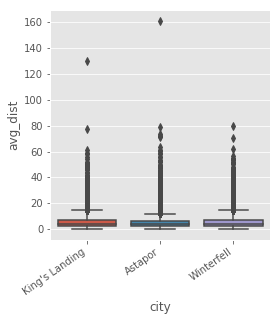

In [69]:
plt.figure(figsize=(17,10))
sns.factorplot(x='city', y= 'avg_dist', data= ultimate_df, kind='box')
plt.xticks(rotation= 35, ha='right')
plt.show()

In [70]:
#2) Predictive model for active users 6 mo out
#this sequence runs through the dataframe, creates a date six months from the start date, and then checks if the last trip falls
#within a 30 days of that time. Then it ouputs a 1 or 0 to a list of active users.

active_users = []
for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [71]:
df1 = pd.DataFrame(active_users,columns = ['active_users'])

In [72]:
#active user is 1, inactive is 0
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

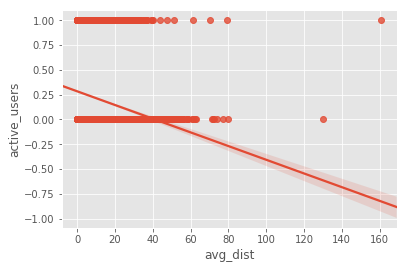

In [73]:
sns.regplot(y=df1['active_users'], x=ultimate_df['avg_dist'], fit_reg = True)

Here we see the correlation between active users, pulled from above and average distance. The data reads that there are less active users for users that travel a greater distance. This makes since as those users likely only need a ride once in a while say to the airport and back, then they likely go dormant, perhaps they own their own vehicle.

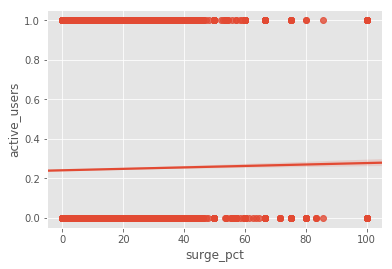

In [74]:
#surge data and active users
sns.regplot(y=df1['active_users'], x=ultimate_df['surge_pct'], fit_reg = True)

There is almost no correlation here, active users do not seem to fluxuate with the surge pricing.

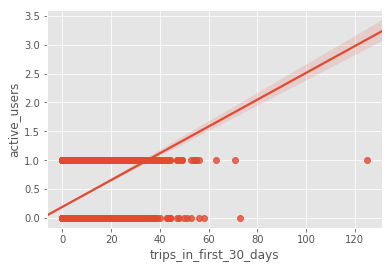

In [75]:

sns.regplot(y=df1['active_users'], x=ultimate_df['trips_in_first_30_days'], fit_reg = True)

Here we see a very strong corellation between active users and trips in the first 30 days. Perhaps there was a promotion going on or those that sign up do not have thier own transportation. Additionally, this can be due to visitors, many people who travel would not have their own transportation and if it's their first time in that city they are very unlikely to know about public transportation and would rely on a service like this. 

In [ ]:
#Categorical Data

In [76]:

df = pd.concat([ultimate_df, df1], axis = 1)

In [77]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_users
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


With this information Ultimate could have a higher retention rate if it knew why it's customers were signing up. For example earlier I mentioned travelers, and if those travelers use Ultimate whereever they go, is Ultimate active in many cities around the globe or is it localized to a particular region or city. Also leverageing the city facts for each, like is there public transportation in these cities, do these cities have particularly large hills, are there convient pick up and drop off points. All of these factors can contribute to weather someone is willing to use the product again and with what frequency. 